# IBM Closing Stock Prediction


In [32]:
import pandas as pd
import numpy as np

In [2]:
stock = pd.read_csv("IBM_2006-01-01_to_2018-01-01.csv")

In [3]:
stock.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB


In [5]:
stock.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [6]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>, <AxesSubplot:>]],
      dtype=object)

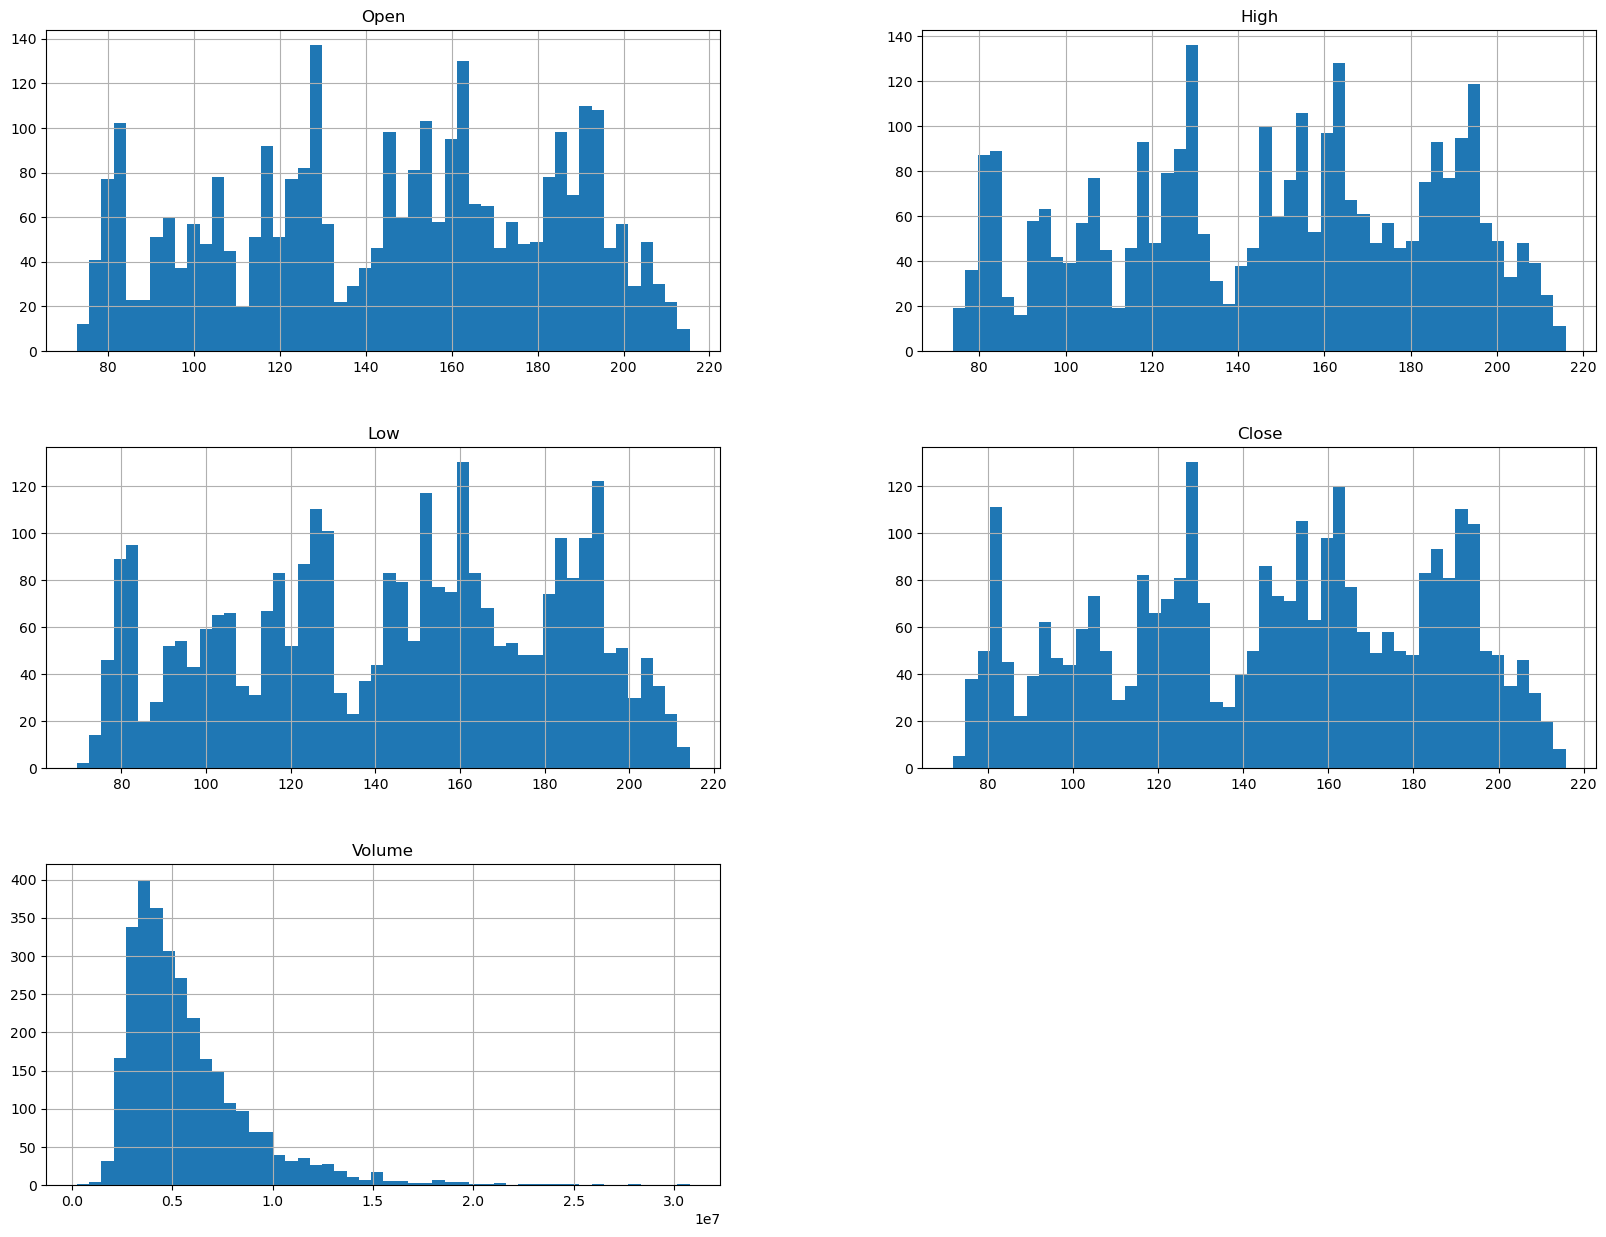

In [7]:
stock.hist(bins=50, figsize=(20,15))

## Missing Attributes

In [8]:
Median_Open = stock['Open'].median()
Median_Low = stock['Low'].median()

In [15]:
stock['Open']=stock['Open'].fillna(Median_Open)

In [16]:
stock['Low']=stock['Low'].fillna(Median_Low)

## Train-Test Splitting

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(stock, test_size=0.2, random_state=42)
print(f"Row in Train set {len(train_set)}\nRows in Test set {len(test_set)}") 

Row in Train set 2416
Rows in Test set 604


array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Volume', ylabel='High'>],
       [<AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Volume', ylabel='Low'>],
       [<AxesSubplot:xlabel='Open', ylabel='Close'>,
        <AxesSubplot:xlabel='High', ylabel='Close'>,
        <AxesSubplot:xlabel='Low', ylabel='Close'>,
        <AxesSubplot:xlabel='Close', ylabel='Close'>,
    

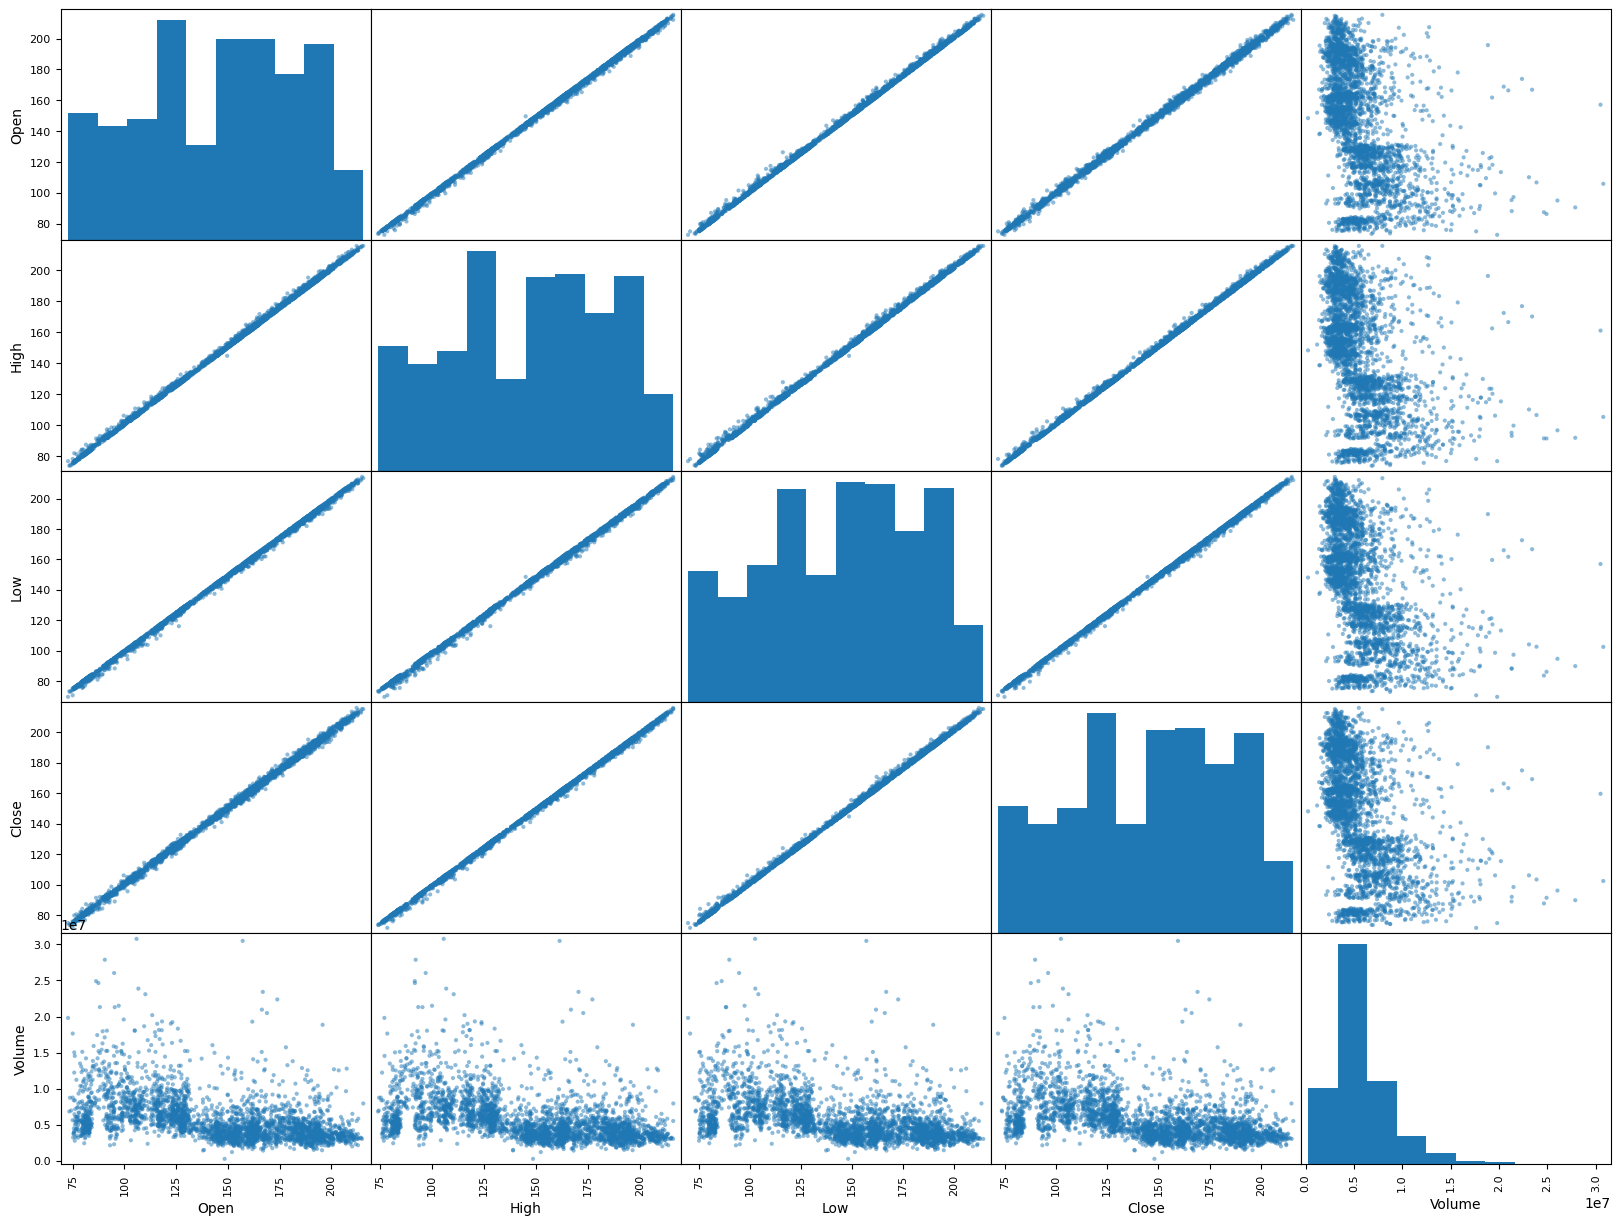

In [18]:
from pandas.plotting import scatter_matrix
attributes = ['Open','High','Low','Close','Volume']
scatter_matrix(stock[attributes], figsize=(20,15))

In [19]:
labe=['Close','Date','Name']
Stock = train_set.drop(labe, axis=1)
Stock_labels=train_set['Close'].copy()

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(Stock, Stock_labels)

RandomForestRegressor()

In [150]:
some_data = Stock.iloc[:5]

In [151]:
some_labels = Stock_labels.iloc[:5]

In [152]:
model.predict(some_data)

array([187.0687,  86.9448,  99.3144,  91.2476, 199.7566])

In [153]:
list(some_labels)

[187.1, 86.95, 99.35, 91.25, 199.74]

## Evaluating the Model

In [154]:
from  sklearn.metrics import mean_squared_error
stock_predict = model.predict(Stock)
mse=mean_squared_error(Stock_labels, stock_predict)
rmse=np.sqrt(mse)

In [155]:
rmse


0.3160027685953583

Model overfited for DecisionTreeRegressor()

## Cross Validation

In [156]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,Stock,Stock_labels, scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [157]:
rmse_scores

array([0.84148346, 0.76899449, 0.84534624, 0.96124117, 0.93919898,
       0.78984911, 0.80865279, 0.76029005, 0.91992946, 0.82943679])

In [158]:
def Print_score(scores):
    #print(f"Scores for {model} model is {scores}")
    return(f"Mean for {model} model is {scores.mean()}\n"),(f"Standers Deviation for {model} model is {scores.std()}\n")

In [159]:
result=list(Print_score(rmse_scores))
result

['Mean for RandomForestRegressor() model is 0.8464422526315692\n',
 'Standers Deviation for RandomForestRegressor() model is 0.06749009775490272\n']

Storing Result In Text file Result.txt

In [160]:
with open('Result.txt', 'a') as f:
    for i in result:
        f.write(i+"\n")

## Joblib Saving Model

In [162]:
from joblib import dump, load

In [163]:
dump(model, 'Stock.joblib')

['Stock.joblib']

# Model Testing

In [164]:
X_test = test_set.drop(labe,axis=1)
Y_test = test_set['Close'].copy()
final_predict = model.predict(X_test)
final_mse = mean_squared_error(Y_test, final_predict)
final_rmse = np.sqrt(final_mse)

In [165]:
final_rmse

0.8759467287394869

In [167]:
print(final_predict, list(Y_test))

[167.2359 204.3972  91.558  174.1107  83.5605  91.4904  84.6119 138.4876
 205.8181 173.2245  75.4673 152.3792 116.4971  82.1264 103.0042 150.8395
  76.8527  81.3465  94.4475 163.9714  97.159  174.3721 146.3684 118.1522
 116.1034  91.6161 168.0062 207.4542 153.6045 203.3735 189.7394 112.646
 100.245  181.9635 148.6208 130.5933 187.0954 195.5415 146.7818 192.2819
 133.3905 151.2761 174.686  159.9297 127.6774 153.9576 207.4858 134.0249
  81.5877 169.0655 128.1558  83.27   204.498  160.5627 162.2425 146.5122
 117.8948  93.0399  81.154  124.705  158.2763 174.2523 157.7661 185.6328
 183.8688 193.2546 168.1491 174.2827  75.2276  93.2643 140.0036  81.3878
 126.0536 126.4894 131.9155 187.3972 157.0638 146.7301 118.7932 194.9334
 150.0743 209.6559 123.7251 170.4669  98.6074 195.4462  83.2688 138.9992
  80.1864  80.5435 192.6515 125.7553  93.023  158.9785 162.1189 145.2641
 184.9745 101.4546 160.9594 160.556  164.74   129.2675  81.8145 144.1378
  82.0484  97.5937 135.4718  84.2161  91.4776 181.93